# 边缘检测

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

读取图像

(-0.5, 1079.5, 713.5, -0.5)

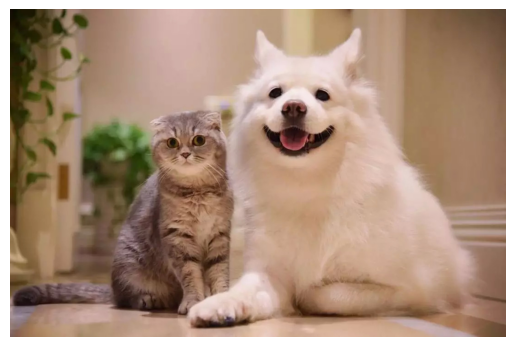

In [6]:
# 读取图像
img = cv2.imread('./images/cat_dog.jpeg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 转成RGB 方便后面显示
plt.imshow(image)
plt.axis('off')


将图像转化成黑白图

(-0.5, 1079.5, 713.5, -0.5)

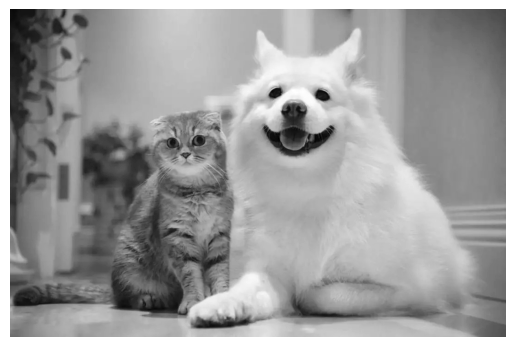

In [7]:
# 灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage, cmap='gray')
plt.axis('off')


接下来就是利用不同的算子，对图像进行边缘检测处理。

In [8]:
# Roberts算子
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
kernely = np.array([[0, -1], [1, 0]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
# 转uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)


# Preitt算子
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
# 转uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)


# Sobel算子
x = cv2.Sobel(grayImage, cv2.CV_16S, 1, 0)  # 对x求一阶导
y = cv2.Sobel(grayImage, cv2.CV_16S, 0, 1)  # 对y求一阶导
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)


# 拉普拉斯算子
dst = cv2.Laplacian(grayImage, cv2.CV_16S, ksize=3)
Laplacian = cv2.convertScaleAbs(dst)



# Canny算子
Canny = cv2.Canny(grayImage,100,150)


画图

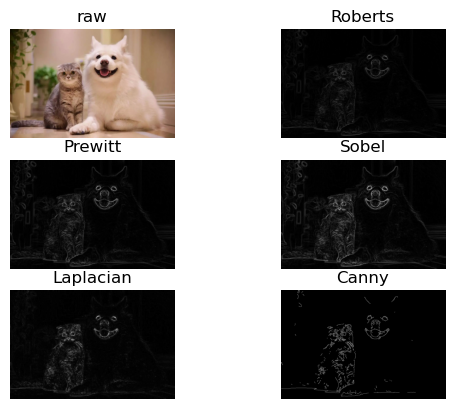

In [10]:
plt.subplot(321),plt.imshow(image),plt.title('raw'), plt.axis('off') #坐标轴关闭
plt.subplot(322),plt.imshow(Roberts, cmap=plt.cm.gray ),plt.title('Roberts'), plt.axis('off')
plt.subplot(323),plt.imshow(Prewitt, cmap=plt.cm.gray ),plt.title('Prewitt'), plt.axis('off')
plt.subplot(324),plt.imshow(Sobel, cmap=plt.cm.gray ),plt.title('Sobel'), plt.axis('off')
plt.subplot(325),plt.imshow(Laplacian, cmap=plt.cm.gray ),plt.title('Laplacian'), plt.axis('off')
plt.subplot(326),plt.imshow(Canny, cmap=plt.cm.gray ),plt.title('Canny'), plt.axis('off')

plt.show()